In [1]:
from PIL import Image
from tensorflow.python.keras.preprocessing.image import img_to_array
import numpy as np

from camkeras import CAM
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cam = CAM('ResNet50', -3)

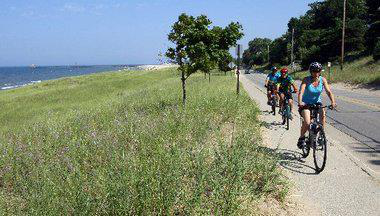

In [3]:
img = Image.open('assets/test.jpg')
img

In [4]:
sz = img.size
sz

(380, 216)

In [6]:
sz = img.size
cams = cam.get_cams_on_batch([np.array(img)], [sz], [444])

[977 444 671 978 975]
(1, 7, 7)


In [7]:
cams[0] -= np.min(cams[0])

In [8]:
cams[0] /= np.max(cams[0])

In [9]:
cams[0] = np.uint8(255 * cams[0])

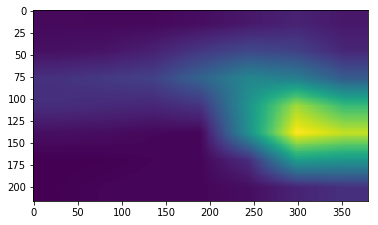

In [10]:
plt.imshow(cams[0])

In [11]:
import cv2
heatmap = cv2.applyColorMap(cams[0], cv2.COLORMAP_HOT)

In [12]:
heatmap.shape

(216, 380, 3)

In [13]:
np.max(heatmap)

255

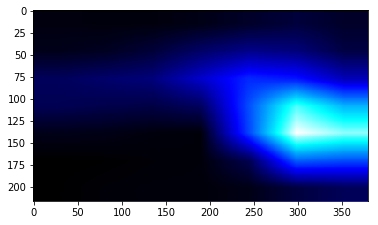

In [14]:
plt.imshow(heatmap)

In [15]:
np.array(img).shape

(216, 380, 3)

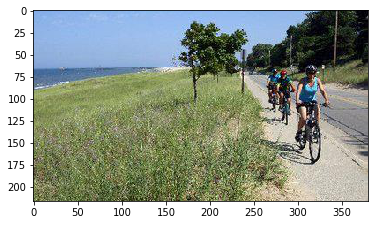

In [21]:
plt.imshow(np.array(img))

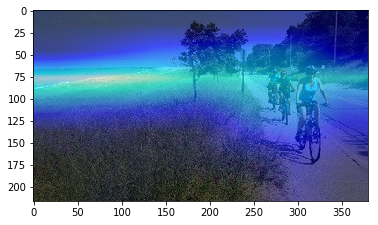

In [22]:
result = np.uint(heatmap * 0.6) + np.uint(np.array(img) * 0.4)
plt.imshow(result)

In [7]:
LABELS_URL = 'https://s3.amazonaws.com/outcome-blog/imagenet/labels.json'


In [8]:
import requests

In [9]:
classes = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()}

In [10]:
[print(k, v) for k, v in classes.items() if 'bicycle' in v ]

444 bicycle-built-for-two, tandem bicycle, tandem


[None]

In [11]:
classes[444]

'bicycle-built-for-two, tandem bicycle, tandem'